In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bikePrices.xlsx")

In [3]:
dataFrame

Price  BikeFeature1  BikeFeature2
0     807.673876   1749.628226   1749.590668
1     959.227520   1748.007826   1751.824206
2     718.020033   1750.122967   1747.977026
3     945.668885   1749.916440   1750.771646
4     955.542968   1750.780519   1750.592430
..           ...           ...           ...
995   833.920637   1750.033229   1749.427281
996   800.298076   1747.996913   1750.035046
997   799.261737   1752.540381   1747.983310
998   705.802257   1751.349290   1747.484989
999  1048.892414   1748.656426   1752.539962

[1000 rows x 3 columns]

In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

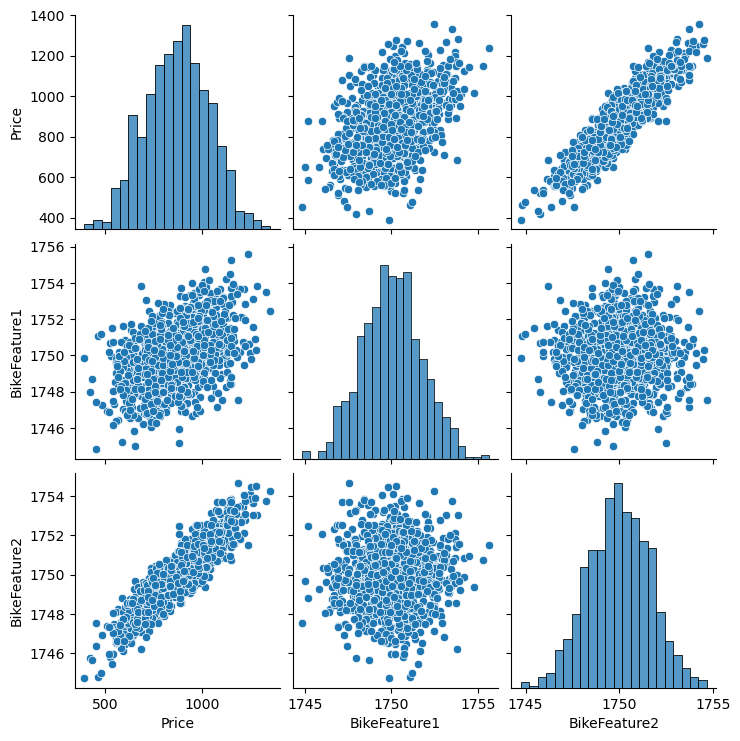

In [5]:
sbn.pairplot(dataFrame)

## Data Test / Train

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#train_test_split

In [8]:
# y = wx + b
# y -> label
y = dataFrame["Price"].values

# x -> feature 
x = dataFrame[["BikeFeature1","BikeFeature2"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

In [9]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [10]:
x_train.shape

(670, 2)

In [11]:
x_test.shape

(330, 2)

In [12]:
y_train.shape

(670,)

In [13]:
y_test.shape

(330,)

## Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(x_train)

MinMaxScaler()

In [17]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [18]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [23]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 805903.5000   
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 805549.4375 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 802308.2500 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 802618.6250 
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 778991.4375 
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 800395.6875 
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 783880.5625 
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 784989.3750 
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 792911.1875 
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 790009.3750 
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 786289.3750 
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 784876.5000 
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 786805.0000 
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [24]:
loss=model.history.history["loss"]

<Axes: >

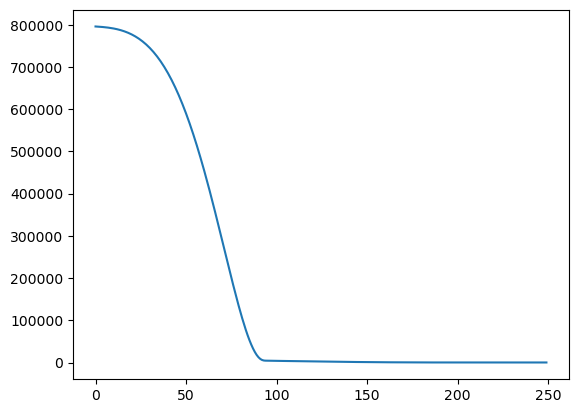

In [25]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [26]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [27]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [28]:
trainLoss

75.18276977539062

In [29]:
testLoss

83.48729705810547

In [30]:
testPredictions = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [31]:
testPredictions

array([[1076.1226 ],
       [ 622.5552 ],
       [ 874.6135 ],
       [ 892.7087 ],
       [ 897.9644 ],
       [ 450.41156],
       [ 929.5904 ],
       [ 989.8281 ],
       [ 939.6459 ],
       [1015.15607],
       [ 749.5526 ],
       [ 916.3348 ],
       [ 945.9389 ],
       [1053.0454 ],
       [1119.7458 ],
       [ 680.24524],
       [1125.2538 ],
       [ 649.63983],
       [1152.8545 ],
       [ 885.0341 ],
       [ 891.3033 ],
       [ 715.42883],
       [ 455.74768],
       [ 610.7653 ],
       [ 833.5441 ],
       [1089.5225 ],
       [ 712.4286 ],
       [ 755.4968 ],
       [ 871.97723],
       [ 769.2188 ],
       [ 450.16504],
       [ 781.6465 ],
       [ 726.9201 ],
       [ 645.51984],
       [ 885.22253],
       [ 842.3317 ],
       [1034.0977 ],
       [1021.1789 ],
       [ 843.4599 ],
       [ 860.73553],
       [ 755.7536 ],
       [1172.8273 ],
       [1095.9221 ],
       [1086.1385 ],
       [ 871.6755 ],
       [ 595.3781 ],
       [1144.0215 ],
       [ 971.

In [32]:
predictionsDf = pd.DataFrame(y_test,columns=["Real Y"])

In [33]:
predictionsDf

Real Y
0    1081.652164
1     622.675990
2     889.356810
3     902.826733
4     897.662404
..           ...
325  1028.438035
326   789.934950
327   758.490486
328  1172.871659
329   820.947936

[330 rows x 1 columns]

In [34]:
testPredictions = pd.Series(testPredictions.reshape(330,))

In [35]:
testPredictions

0      1076.122559
1       622.555176
2       874.613525
3       892.708679
4       897.964417
          ...     
325    1011.942078
326     789.390320
327     764.566223
328    1165.840820
329     801.317078
Length: 330, dtype: float32

In [36]:
predictionsDf = pd.concat([predictionsDf,testPredictions],axis=1)

In [37]:
predictionsDf

Real Y            0
0    1081.652164  1076.122559
1     622.675990   622.555176
2     889.356810   874.613525
3     902.826733   892.708679
4     897.662404   897.964417
..           ...          ...
325  1028.438035  1011.942078
326   789.934950   789.390320
327   758.490486   764.566223
328  1172.871659  1165.840820
329   820.947936   801.317078

[330 rows x 2 columns]

In [38]:
predictionsDf.columns = ["Real Y","Prediction Y"]

In [39]:
predictionsDf

Real Y  Prediction Y
0    1081.652164   1076.122559
1     622.675990    622.555176
2     889.356810    874.613525
3     902.826733    892.708679
4     897.662404    897.964417
..           ...           ...
325  1028.438035   1011.942078
326   789.934950    789.390320
327   758.490486    764.566223
328  1172.871659   1165.840820
329   820.947936    801.317078

[330 rows x 2 columns]

<Axes: xlabel='Real Y', ylabel='Prediction Y'>

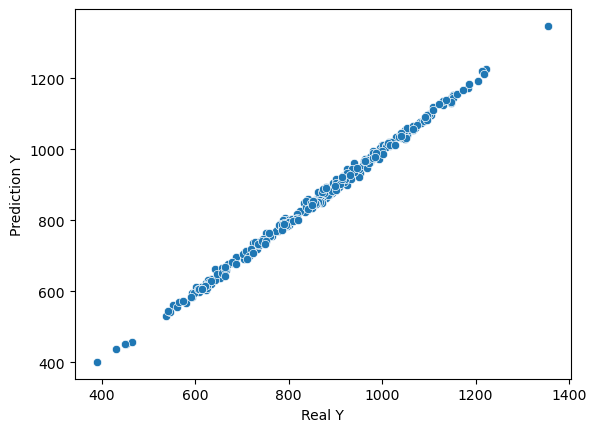

In [40]:
sbn.scatterplot(x="Real Y",y="Prediction Y", data= predictionsDf)

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
mean_absolute_error(predictionsDf['Real Y'],predictionsDf["Prediction Y"])

7.330697866526986

In [43]:
mean_squared_error(predictionsDf['Real Y'],predictionsDf["Prediction Y"])

83.48732034620879

In [44]:
dataFrame.describe()

Price  BikeFeature1  BikeFeature2
count  1000.000000   1000.000000   1000.000000
mean    872.677801   1750.024800   1749.964733
std     164.124504      1.704531      1.659578
min     390.856887   1744.852108   1744.742389
25%     757.795031   1748.831119   1748.803186
50%     879.168705   1750.017350   1750.003926
75%     988.612778   1751.115765   1751.129414
max    1355.213745   1755.613884   1754.666038

In [45]:
newBike=[[1750,1751]]

In [46]:
newBike = scaler.transform(newBike)

In [47]:
newBike

array([[0.47099003, 0.62095915]])

In [48]:
model.predict(newBike)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[961.2671]], dtype=float32)

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save("bike_model.keras")

In [51]:
calledModel = load_model("bike_model.keras")

In [52]:
calledModel.predict(newBike)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[961.2671]], dtype=float32)